In [2]:
# !pip install pycaret==3.0.4
# !pip install shap
# ! pip install autoviz

In [57]:
import pandas as pd
# import numpy as np
# import pycaret
# import matplotlib
from pycaret.classification import *
from pyperclip import copy
from copy import deepcopy 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

In [39]:
filename = "./data.csv"
df_test = pd.read_csv(filename)
label_mapping = {'Yes': 1, 'No': 0}
# 'Label'列をマップして変換
purpose = "Attrition"
df_test[purpose] = df_test[purpose].map(label_mapping)
df_test["OverTime"] = df_test["OverTime"].map(label_mapping)

# purpose = "MonthlyAchievement"
# df = df.dropna(subset=[purpose])

exp = setup(data = df_test, target = purpose)

,Description,Value
0,Session id,4337
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1470, 38)"
4,Transformed data shape,"(1470, 62)"
5,Transformed train set shape,"(1029, 62)"
6,Transformed test set shape,"(441, 62)"
7,Ordinal features,1
8,Numeric features,29
9,Categorical features,8


In [40]:
df_test[:10]

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyAchievement,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,4,Male,64,2,1,Research Scientist,4,Married,2889,26897,1,Y,0,5,1,3,80,2,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,1,Male,76,3,1,Research Scientist,3,Divorced,2517,3208,1,Y,0,5,1,2,80,3,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,1,5,1,4,80,0,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,3,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,Y,0,5,1,3,80,1,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,0,5,1,3,80,0,5,5,1,0,0,0,0,New_graduate_recruitment,0,1
5,27,0,Travel_Rarely,1377,Sales,2,3,Life Sciences,1,437,4,Male,74,3,2,Sales Executive,3,Single,4478,5242,1,Y,1,5,1,1,80,0,5,3,3,5,4,0,4,New_graduate_recruitment,0,2
6,21,1,Travel_Frequently,756,Sales,1,1,Technical Degree,1,478,1,Female,99,2,1,Sales Representative,2,Single,2174,9150,1,Y,1,5,1,3,80,0,3,3,3,3,2,1,2,direct_recruting,0,1
7,25,0,Travel_Rarely,891,Sales,4,2,Life Sciences,1,527,2,Female,99,2,2,Sales Executive,4,Single,4487,12090,1,Y,1,5,1,2,80,0,5,3,3,5,4,1,3,agent_A,0,3
8,26,1,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,2,Female,58,3,1,Human Resources,3,Divorced,2741,22808,0,Y,1,5,1,2,80,1,8,2,2,7,7,1,0,agent_A,0,2
9,24,0,Travel_Rarely,691,Research & Development,23,3,Medical,1,639,2,Male,89,4,1,Research Scientist,4,Married,2725,21630,1,Y,1,5,1,2,80,2,6,3,3,6,5,1,4,New_graduate_recruitment,0,4


In [7]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:02:07
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8873,0.8446,0.4761,0.7407,0.5766,0.5153,0.5337,0.7080
xgboost,Extreme Gradient Boosting,0.8863,0.8489,0.3930,0.8161,0.5262,0.4708,0.5135,0.7590
gbc,Gradient Boosting Classifier,0.8776,0.8476,0.3570,0.7601,0.4764,0.4194,0.4615,0.7710
catboost,CatBoost Classifier,0.8776,0.8572,0.2838,0.8875,0.4192,0.3728,0.4515,1.8670
lda,Linear Discriminant Analysis,0.8756,0.8550,0.4386,0.7038,0.5319,0.4649,0.4868,0.6750
ridge,Ridge Classifier,0.8737,0.0000,0.2699,0.8635,0.4017,0.3531,0.4320,0.6610
lightgbm,Light Gradient Boosting Machine,0.8727,0.8511,0.3210,0.7568,0.4418,0.3849,0.4335,0.9530
et,Extra Trees Classifier,0.8620,0.8250,0.1688,0.8750,0.2722,0.2366,0.3366,0.7710
lr,Logistic Regression,0.8572,0.7973,0.2588,0.6630,0.3678,0.3041,0.3492,1.1600
rf,Random Forest Classifier,0.8533,0.8315,0.1331,0.8400,0.2225,0.1856,0.2854,0.7710


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [8]:
best

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=778)

In [44]:
df_test["Attrition"].value_counts()
df_no_overtime = deepcopy(df_test)
df_no_overtime["OverTime"] = 0
df_no_overtime[:5]

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyAchievement,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,4,Male,64,2,1,Research Scientist,4,Married,2889,26897,1,Y,0,5,1,3,80,2,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,1,Male,76,3,1,Research Scientist,3,Divorced,2517,3208,1,Y,0,5,1,2,80,3,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,0,5,1,4,80,0,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,3,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,Y,0,5,1,3,80,1,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,0,5,1,3,80,0,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8641,0.8463,0.3750,0.6000,0.4615,0.3885,0.4025
1,0.9126,0.8915,0.6250,0.7692,0.6897,0.6394,0.6441
2,0.8544,0.7759,0.1875,0.6000,0.2857,0.2287,0.2773
3,0.8835,0.7941,0.3529,0.8571,0.5000,0.4467,0.5034
4,0.8641,0.8536,0.4118,0.6364,0.5000,0.4255,0.4390
5,0.8738,0.8865,0.4118,0.7000,0.5185,0.4515,0.4725
6,0.8932,0.9015,0.4118,0.8750,0.5600,0.5080,0.5550
7,0.8350,0.7804,0.2941,0.5000,0.3704,0.2827,0.2959
8,0.9029,0.8755,0.5294,0.8182,0.6429,0.5896,0.6084


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8738,0.9138,0.4375,0.6364,0.5185,0.4487,0.4592
1,0.9223,0.8764,0.5625,0.9000,0.6923,0.6506,0.6741
2,0.8447,0.8024,0.1250,0.5000,0.2000,0.1470,0.1913
3,0.8544,0.7339,0.2941,0.6250,0.4000,0.3291,0.3595
4,0.8932,0.8953,0.4706,0.8000,0.5926,0.5358,0.5609
5,0.8932,0.9124,0.4706,0.8000,0.5926,0.5358,0.5609
6,0.8932,0.8981,0.4706,0.8000,0.5926,0.5358,0.5609
7,0.8252,0.6936,0.2353,0.4444,0.3077,0.2184,0.2329
8,0.8738,0.8906,0.4118,0.7000,0.5185,0.4515,0.4725


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


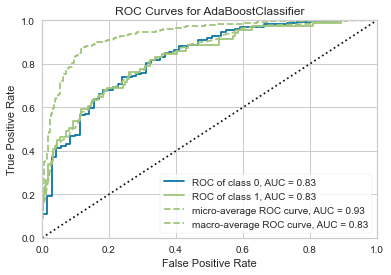

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8776,0.9043,0.2785,0.8800,0.4231,0.3746,0.4532


,Age,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyAchievement,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,Attrition,prediction_label,prediction_score
0,25,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,4,Male,64,2,1,Research Scientist,4,Married,2889,26897,1,Y,0,5,1,3,80,2,2,2,3,2,2,2,1,intern,0,4,0,0,0.5200
1,27,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,1,Male,76,3,1,Research Scientist,3,Divorced,2517,3208,1,Y,0,5,1,2,80,3,5,2,3,5,3,0,3,intern,0,1,0,0,0.5195
2,25,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,0,5,1,4,80,0,6,1,3,6,4,0,3,agent_A,0,2,1,0,0.5153
3,28,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,3,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,Y,0,5,1,3,80,1,5,2,1,5,2,0,2,New_graduate_recruitment,0,5,0,0,0.5181
4,28,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,0,5,1,3,80,0,5,5,1,0,0,0,0,New_graduate_recruitment,0,1,1,0,0.5027


In [45]:
model = create_model(best)
tuned_model = tune_model(model)
plot_model(tuned_model)

In [46]:
final_model = finalize_model(tuned_model)
no_overtime_predictions = predict_model(final_model, data=df_no_overtime)
no_overtime_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8776,0.9043,0.2785,0.8800,0.4231,0.3746,0.4532


,Age,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyAchievement,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,Attrition,prediction_label,prediction_score
0,25,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,4,Male,64,2,1,Research Scientist,4,Married,2889,26897,1,Y,0,5,1,3,80,2,2,2,3,2,2,2,1,intern,0,4,0,0,0.5200
1,27,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,1,Male,76,3,1,Research Scientist,3,Divorced,2517,3208,1,Y,0,5,1,2,80,3,5,2,3,5,3,0,3,intern,0,1,0,0,0.5195
2,25,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,0,5,1,4,80,0,6,1,3,6,4,0,3,agent_A,0,2,1,0,0.5153
3,28,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,3,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,Y,0,5,1,3,80,1,5,2,1,5,2,0,2,New_graduate_recruitment,0,5,0,0,0.5181
4,28,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,0,5,1,3,80,0,5,5,1,0,0,0,0,New_graduate_recruitment,0,1,1,0,0.5027


In [48]:
df_test["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [64]:
no_overtime_predictions["prediction_label"].value_counts()
f = open("nppp.txt","w")
f.write("[\n")
for i in no_overtime_predictions["prediction_label"]:
    f.write(str(i) + ",")
f.write("]\n")
f.close()



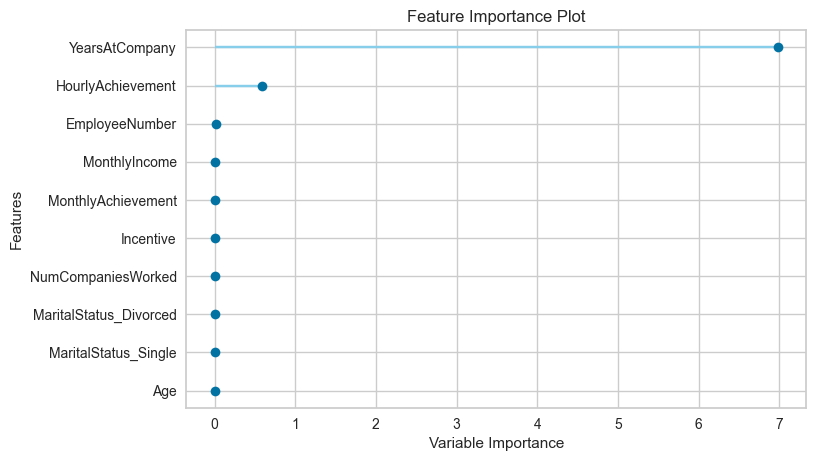

In [ ]:
plot_model(tuned_model, plot='feature')

In [ ]:
# %matplotlib inline
# eda(display_format="html") 

# from autoviz.AutoViz_Class import AutoViz_Class
# import pandas as pd
# AV = AutoViz_Class()

# dft = AV.AutoViz( "" ,sep=',', depVar=purpose, dfte=df, header=0, verbose=2,
# lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)